In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Load data
df = pd.read_csv('../data/Superstore_clean.csv')

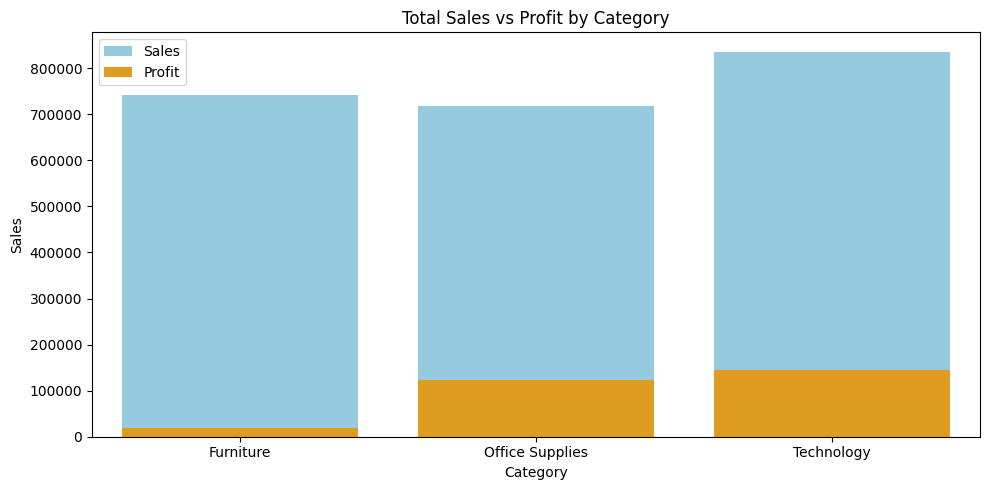

In [21]:
#----------------------------------------
# Sales and profit overview by category
#----------------------------------------

cat_summary = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
plt.figure(figsize= (10, 5))

sns.barplot(data= cat_summary,
            x= 'Category',
            y='Sales',
            color='skyblue',
            label='Sales')
sns.barplot(data=cat_summary,
            x='Category',
            y='Profit',
            color='orange',
            label='Profit'
            )
plt.title('Total Sales vs Profit by Category')
plt.legend()
plt.tight_layout()
plt.savefig('../visuals/sales_vs_profit.png')
plt.show()

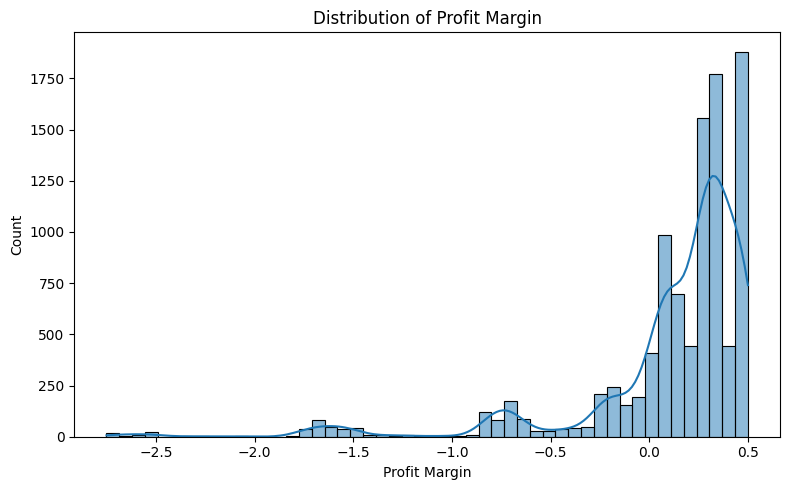

In [3]:
#----------------------------------------
# Profit Margin Distribution
#----------------------------------------

plt.figure(figsize=(8,5))
sns.histplot(df['Profit Margin'].dropna(),
             bins=50,
             kde=True)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.tight_layout()
plt.savefig('../visuals/Profit_margin_distribution.png')
plt.show()

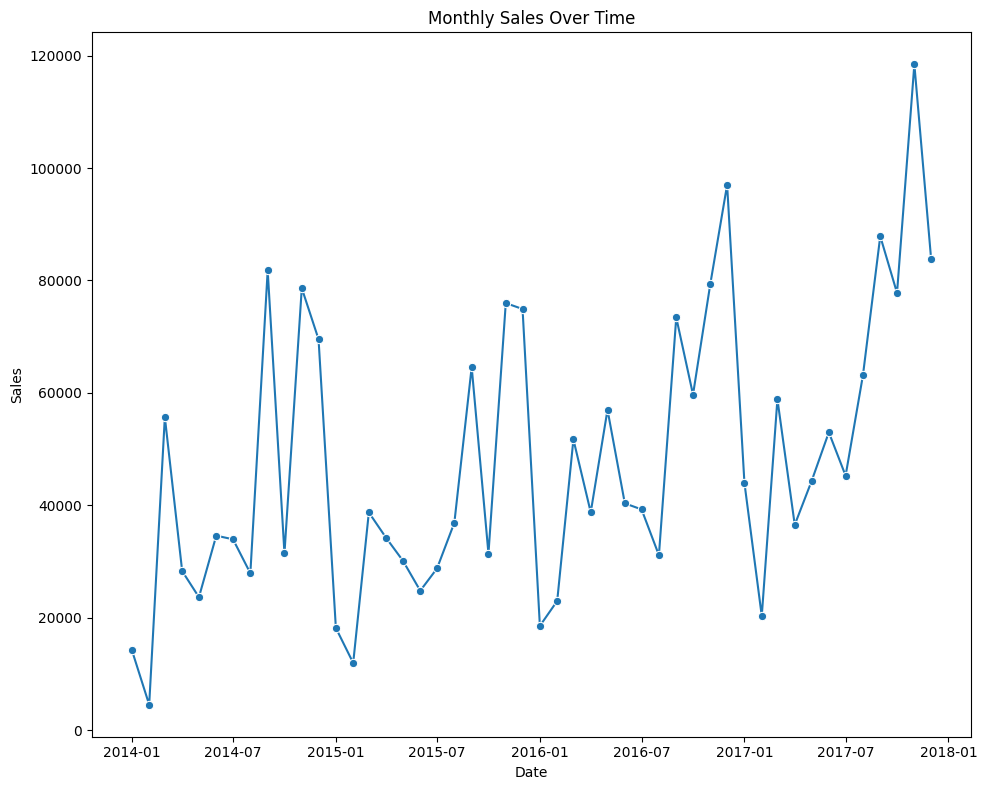

In [19]:
#----------------------------------------
# Monthly Sales Trend
#----------------------------------------

monthly_sales = df.groupby([df['Order Year'], df['Order Month']])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(dict(year=monthly_sales['Order Year'], month= monthly_sales['Order Month'], day = 1))

plt.figure(figsize=(10, 8))
sns.lineplot(data= monthly_sales,
             x= 'Date',
             y= 'Sales',
             marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('../visuals/Sales_over_time.png')
plt.show()

In [4]:
#----------------------------------------
# Sales & Profit by Region and Segment
#----------------------------------------

region_segment = df.groupby(['Region','Segment'])[['Sales', 'Profit']].sum().reset_index()
fig = px.bar(region_segment,
             x='Region',
             y='Sales',
             color='Segment',
             title='Sales by Region and Customer Segment',
             barmode='group')
fig.write_image('../visuals/Sales_by_region.png')
fig.show()

C:\Users\jeanp\AppData\Local\Temp\ipykernel_6160\3323678945.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_products.values,


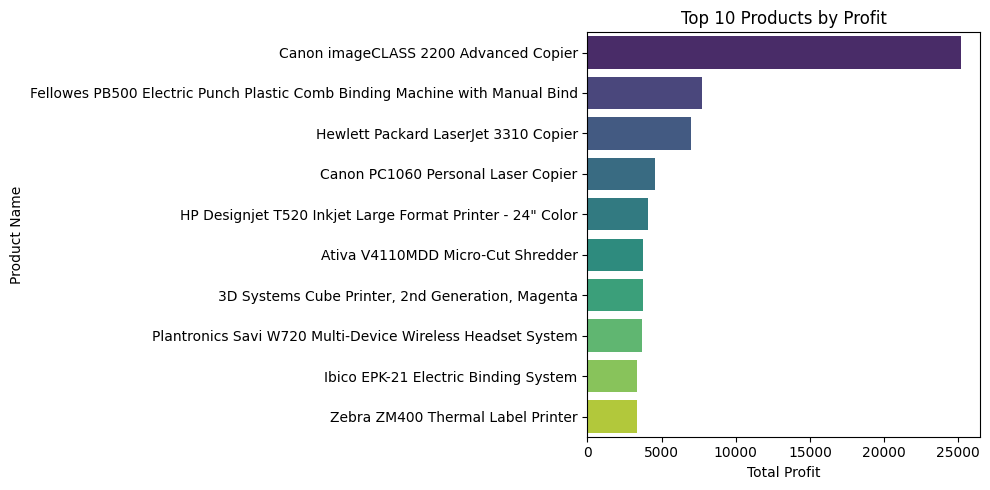

In [17]:
#----------------------------------------
# Top 10 Products by Profit
#----------------------------------------

top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x= top_products.values,
            y= top_products.index,
            palette= 'viridis')
plt.title('Top 10 Products by Profit')
plt.xlabel('Total Profit')
plt.tight_layout()
plt.savefig('../visuals/Top_10_products.png')
plt.show()

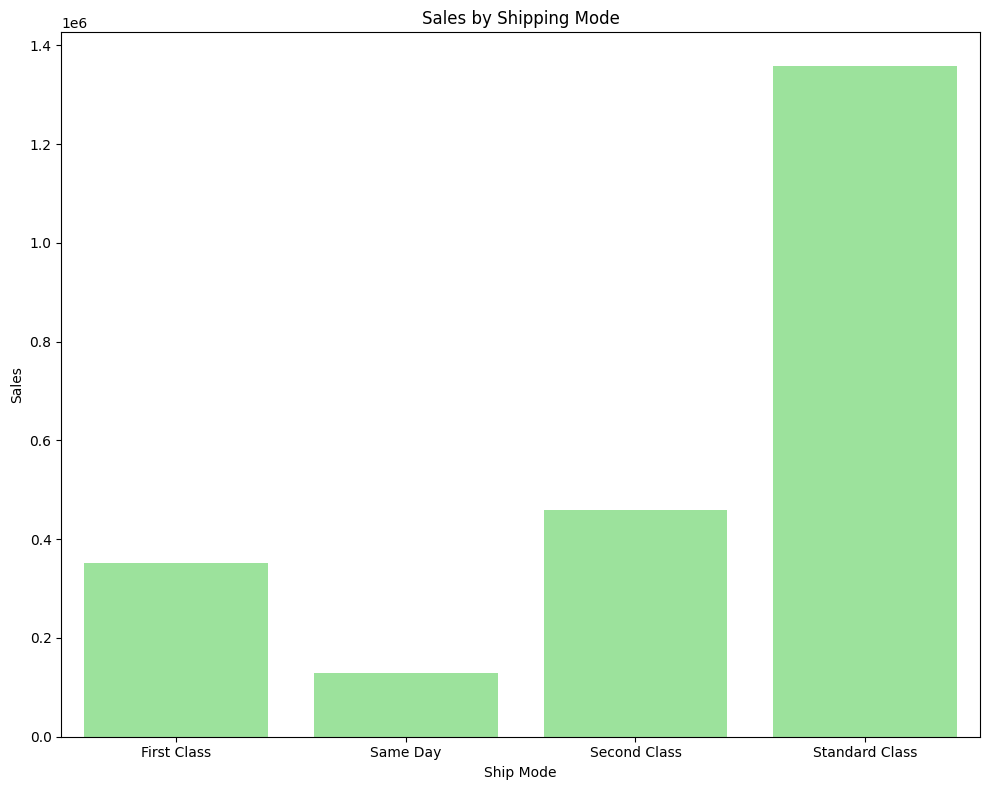

In [22]:
#----------------------------------------
# Shipping Mode Analysis
#----------------------------------------

ship_mode = df.groupby('Ship Mode')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(data=ship_mode,
            x='Ship Mode',
            y='Sales',
            color='lightgreen')
plt.title('Sales by Shipping Mode')
plt.tight_layout()
plt.savefig('../visuals/sales_by_shipping_mode.png')
plt.show()
